<a href="https://colab.research.google.com/github/DaniYama/DSWPmy/blob/main/Notebooks/NB11__DataViz_Matplotlib%20%26%20Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Referência
* [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

*ver: Data story telling*
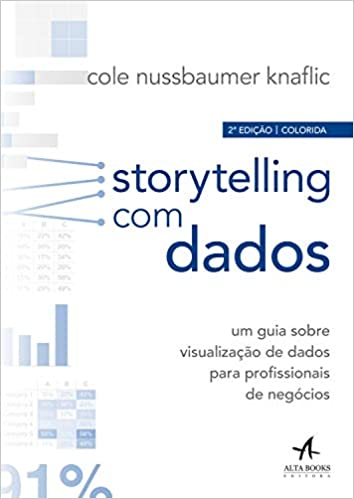

*Provavelmente na receita vai usar power BI*


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #librarys para visualization
import seaborn as sns
import bokeh # library necessária para conversar com contagil

plt.rcParams["figure.figsize"] = [15, 12]
%matplotlib inline

## Séries temporais simples

#### Série/Dados simulados

In [ ]:
from datetime import datetime

dt_hoje = datetime.strptime('2020-10-14', '%Y-%m-%d')
dt_inicio = datetime.strptime('2020-01-01', '%Y-%m-%d')

In [ ]:
# Quantos dias desde a data inicial?
i_quantidade_dias = abs((dt_hoje - dt_inicio).days)
i_quantidade_dias

In [ ]:
np.random.seed(20111974)

i_qtd_ativos = 4
df_series_temporais = pd.DataFrame(np.random.randn(i_quantidade_dias, i_qtd_ativos), index = pd.date_range(dt_inicio, periods = i_quantidade_dias)) #, columns = list('ABCD'))
df_series_temporais.columns = ['Ativo1', 'Ativo2', 'Ativo3', 'Ativo4']

#serie_temporal = pd.Series(np.random.randn(i_quantidade_dias), index = pd.date_range(dt_inicio, periods = i_quantidade_dias))
df_series_temporais.head()

## Gráfico de séries temporais

In [ ]:
df_series_temporais2 = df_series_temporais.cumsum()
plt.figure()
df_series_temporais2.plot()

Gráfico de 1 única série temporal

In [ ]:
df_series_temporais3 = df_series_temporais['Ativo1'] #somente uma das séries
plt.figure()
df_series_temporais3.plot()

In [ ]:
df_series_temporais3 = df_series_temporais['Ativo1'].cumsum()
plt.figure()
df_series_temporais3.plot()

Experimente kind = {'line', 'box', 'hist', 'kde'}

In [ ]:
df_series_temporais3 = df_series_temporais['Ativo1'].cumsum()
plt.figure()
df_series_temporais3.plot(kind = 'box')

### Se quisermos comparar horizontalmente
* No caso abaixo, estou a comparar as colunas 'Ativo1', 'Ativo2', 'Ativo3' e 'Ativo4' quanto ao conteúdo da linha 3 --> iloc[3].

In [ ]:
df_series_temporais2.head()

In [ ]:
plt.figure()
df_series_temporais2.iloc[3].plot(kind ='bar') #somente para linha 3

In [ ]:
df_series_temporais2.head()

In [ ]:
df_series_temporais2.iloc[3]

### Comparar grupos
* Neste caso, vou selecionar (ou dar um zoom) somente em alguns dias do dataframe.

In [ ]:
df_series_temporais2_zoom = df_series_temporais2[0:10]
df_series_temporais2_zoom

In [ ]:
df_series_temporais2_zoom.plot(kind = 'bar')

#### Outra forma de visualizar o mesmo resultado:
* stacked bar plot --> Basta usar o parâmetro stacked = True

In [ ]:
df_series_temporais2_zoom.plot(kind = 'bar', stacked = True)

### Se quiser visualizar o gráfico na horizontal...

In [ ]:
df_series_temporais2_zoom.plot(kind = 'barh', stacked = True)

### Histogramas

In [ ]:
df_series_temporais2.plot(kind = 'hist', bins = 100) # O que são bins?

In [ ]:
df_series_temporais2.plot(kind = 'hist', bins = 10) # O que são bins?

#### Histograma individual

In [ ]:
plt.figure()
df_series_temporais2['Ativo3'].diff().hist() # Veja abaixo melhores explicações sobre o método diff(axis, periods) 

In [ ]:
df_series_temporais2.head()

In [ ]:
df_series_temporais2.diff(axis = 0, periods= 1).head() # dia d - (d-1) diferença entre linhas

In [ ]:
df_series_temporais2.iloc[1][0] - df_series_temporais2.iloc[0][0] # conta que está fazendo

#### diff(axis = 1, periods = 1) aplica a diferença nas colunas! Veja abaixo:



In [ ]:
df_series_temporais2.diff(axis = 1, periods = 1).head() # dieferença entre colunas

### Histogramas em múltiplos gráficos

In [ ]:
plt.figure()
df_series_temporais2.diff(axis = 0, periods = 1).hist(color ='k', alpha = 0.5, bins = 50)

## Boxplot

In [ ]:
plt.figure()
boxplot = df_series_temporais2.boxplot(vert = True) # Observe o parâmetro vert = True

In [ ]:
plt.figure()
boxplot = df_series_temporais2.boxplot(vert = False) # Observe o parâmetro vert = False

#### Dados sobre a qualidade de vinhos - White vs Red

* O objetivo é avaliar a qualidade dos vinhos (tinto vs branco), numa scala de 0–100. A seguir, a qualidade em função da escala:

* 95–100 Classic: a great wine
* 90–94 Outstanding: a wine of superior character and style
* 85–89 Very good: a wine with special qualities
* 80–84 Good: a solid, well-made wine
* 75–79 Mediocre: a drinkable wine that may have minor flaws
* 50–74 Not recommended

In [ ]:
url_tinto = 'https://raw.githubusercontent.com/MathMachado/DataFrames/master/Wine_red.csv?token=AGDJQ64FIW7QA6DNJTVT6JC7SACV6'
url_branco = 'https://raw.githubusercontent.com/MathMachado/DataFrames/master/Wine_white.csv?token=AGDJQ67RPQDN45RZYZHV5SK7SACXY'
df_vinho_tinto = pd.read_csv(url_tinto)
df_vinho_tinto["color"] = 1 # --> Vinho Tinto

df_vinho_branco = pd.read_csv(url_branco)
df_vinho_branco["color"] = 0 # --> Vinho Branco - lê a coluna e já atribui o tipo tinto ou branco

In [ ]:
df_vinhos = pd.concat([df_vinho_tinto, df_vinho_branco], axis = 0)
df_vinhos.shape

In [ ]:
df_vinho_tinto.columns

In [ ]:
df_vinhos['quality'].value_counts()

In [ ]:
df_vinhos['color'].value_counts() # tem 3x mais tinto do que brnaco

#### Tratamento do nome das colunas

In [ ]:
df_vinhos.head


In [ ]:
df_vinhos.columns = [col.lower() for col in df_vinhos.columns]

# substituir ' ' por '_' no nome das colunas:
df_vinhos.columns = [col.replace(' ', '_') for col in df_vinhos.columns]
df_vinhos.head()

In [ ]:
df_vinhos.describe()

In [ ]:
print(f"Média do vinho Branco: {df_vinho_branco['quality'].mean()}")
print(f"Média do vinho Tinto.: {df_vinho_tinto['quality'].mean()}")
print(f"Média Geral..........: {df_vinhos['quality'].mean()}")

Abaixo, o mesmo cálculo, porém usando o artificio de procurar/selecionar o tipo que queremos no dataframe:

In [ ]:
print(f"Média do vinho Branco: {df_vinhos[df_vinhos['color'] == 0]['quality'].mean()}")
print(f"Média do vinho Tinto.: {df_vinhos[df_vinhos['color'] == 1]['quality'].mean()}")
print(f"Média Geral..........: {df_vinhos['quality'].mean()}")

In [ ]:
df_vinhos.columns

In [ ]:
df_vinhos[df_vinhos['color'] == 1]['quality'] # filtra tinto

A seguir, algo mais sofisticado, contendo título do gráfico, annotations e etc

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df_vinhos['quality'].value_counts().plot(kind = 'bar')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6)) #tamanho da figura
df_vinhos['quality'].value_counts().plot(kind = 'bar')

# configurar o grafico

# Título e label dos eixos X e Y
plt.title('Avaliação da qualidade do vinho', fontsize = 25)
plt.xlabel('Atributo: quality', fontsize = 10)
plt.ylabel('Quantidade', fontsize = 10)

# Colocar grid no gráfico
ax.grid(True)

# Configurar a legenda
plt.legend()

# Configurar limites do eixo Y
plt.ylim(0, 3000)

# Configurar limites do eixo X
#plt.xlim(0, 3000)
 
# Show graphic
plt.show()

In [ ]:
df_vinhos['color'].value_counts().plot(kind = 'bar')

In [ ]:
df_vinhos.head()

In [ ]:
df_vinhos['fixed_acidity'].value_counts().sort_index().plot(kind = 'area')

In [ ]:
l_colunas = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']
for caracteristica in l_colunas:
    plt.figure() # Tire esta linha e veja o resultado
    df_vinhos[caracteristica].value_counts().sort_index().plot(kind = 'area')

In [ ]:
l_colunas = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']
l_colunas = df_vinhos.columns  # automatizando
for caracteristica in l_colunas:
    plt.figure() # Tire esta linha e veja o resultado
    df_vinhos[caracteristica].value_counts().sort_index().plot(kind = 'area')

###DESAFIO tornar o grafico mais informativo, colocar *legendas*

### Correlações

In [ ]:
correlacoes = df_vinhos.corr()

top_correlacoes_cols = correlacoes.color.sort_values(ascending=False).keys()
top_correlacoes = correlacoes.loc[top_correlacoes_cols, top_correlacoes_cols]
dropSelf = np.zeros_like(top_correlacoes)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(15, 9))
sns.heatmap(top_correlacoes, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)
plt.show()
del correlacoes, dropSelf, top_correlacoes

In [ ]:
df_vinhos.head()

### Avaliar o comportamento bivariado ou a relação entre a variável-target e a variável preditora

In [ ]:
sns.jointplot(df_vinhos['alcohol'], df_vinhos['fixed_acidity'], kind = "kde")
plt.savefig('minha_figura.png')
plt.show()

In [ ]:
sns.jointplot(df_vinhos['alcohol'], df_vinhos['fixed_acidity'], kind = "kde")
plt.savefig('minha_figura.png')
plt.show()

In [ ]:
sns.jointplot(df_vinhos['color'], df_vinhos['chlorides'], kind = "kde")
plt.savefig('minha_figura.png')
plt.show()

### Pairplot
* Verificar relacionamentos entre pares no dataframe.

In [ ]:
#sns.pairplot(df_vinhos, hue = "color") # Compare os gráficos com e sem a opção hue
sns.pairplot(df_vinhos)
plt.show()

In [ ]:
#grafico segmentar por cor
sns.pairplot(df_vinhos, hue = "color")
plt.show()

In [ ]:
df_vinhos.head()

In [ ]:
sns.lmplot("alcohol", "sulphates", df_vinhos, hue = "color", fit_reg = False)

In [ ]:
sns.lmplot("alcohol", "sulphates", df_vinhos, hue = "quality", fit_reg = False)

### Boxplot

In [ ]:
df_vinhos.boxplot(column = 'alcohol', by = 'quality', figsize = (12, 8))
plt.xlabel('Quality', fontsize = 10, color= 'blue')
plt.ylabel('alcohol', fontsize = 10, color= 'blue')
plt.show()